# 一、什么是决策树？

决策树是经典的分类算法，是一种树型结构，其中每个内部结点表示在一个属性上的测试，每个分支代表一个测试输出，每个叶结点代表一种类别。通常情况下，将决策树用作分类器会有很好的预测准确率，决策树模型通常用来进行用户分级评估、贷款风险评估、选股、投标决策等。

决策树属于经典的数据挖掘算法之一，规则是类似if-then的思想，如果这样，选择什么，然后再进行判断，如果这样，选择什么，直到选择需要的最终结果，是一种类似于流程图的树状结构，该算法简单直观、通俗易懂，而且算法的输出结果具有很强的解释性。

现在来做一个使用决策树的假设：依据现有条件决定是否相亲的假设，

>王xx单身，一天她妈妈要给她介绍男朋友，于是妈妈和女儿的一场对话如下：
妈妈：给你介绍一男的
女儿：帅吗？
妈妈：一般。
女儿：性格怎样？
妈妈：不好。
女儿：不见！

>第二天，妈妈又找到一位男士
妈妈：给你介绍一男的
女儿：帅吗？
妈妈：还好。
女儿：收入高不？
妈妈：不高。
女儿：不见！

>妈妈：给你介绍一男的
女儿：帅吗？
妈妈：帅。
女儿：见！
妈妈：噢耶！
 
>妈妈：给你介绍一男的
女儿：帅吗？
妈妈：还好。
女儿：性格好吗？
妈妈：好。
女儿：见！！
妈妈：噢耶！！
 
>妈妈：给你介绍一男的
女儿：帅吗？
妈妈：不帅。
女儿：收入高不？
妈妈：高。
女儿：见！！！
妈妈：噢耶！！！


根据已有信息，可以将数据对话抽象为以下树状结构，树每一个分支都得到了一个明确答案，见或不见！妈妈以后拿着这颗树直接可以比较男方的信息是否符合见面的条件，根本无需再问她任何问题，除非xx有新的想法。例如，xx还想知道男方的身高怎样，在这种情况下，这颗树还要继续生长。

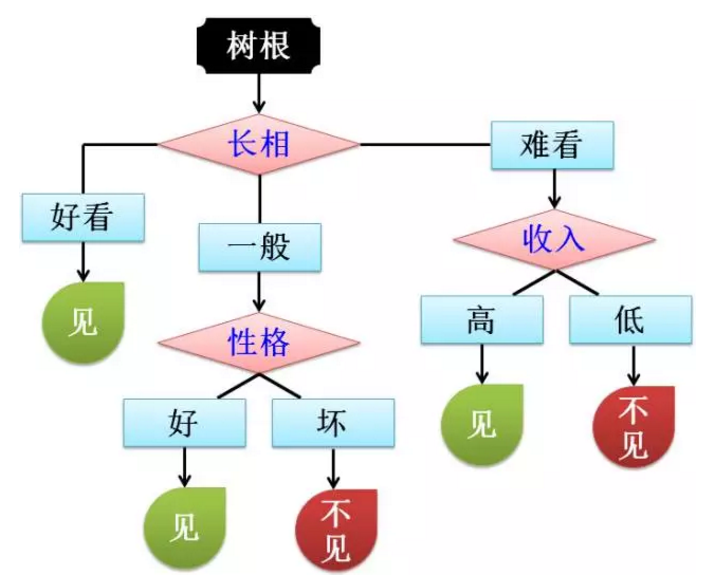

该决策树呈现自顶向下的生长过程，通过决策树可以将数据中隐藏的规律直观的表现出来，分为根节点、中间节点、叶节点。

根节点：黑色的树根

(内节点)中间节点：菱形的内容

叶节点：最小一级的结果

用决策树分类，从根结点开始，对样例的某一个特征进行测试，根据测试结果，将样例分配到其子结点。此时，每一个子结点对应着该特征的一个取值。如此递推下去对样例测试再分配，直到达到叶结点而分到其类中。

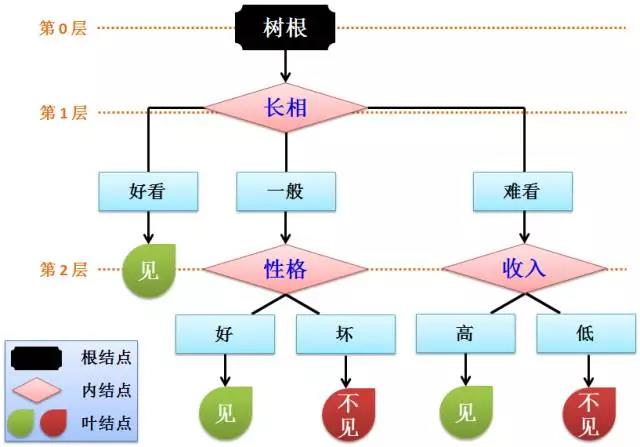

黑色多边形根结点

粉色菱形内结点：表示特征长相、性格、类

天蓝色矩形：表示特征值，即对父节点的类别进行划分

绿色红色叶结点：表示类，绿色正类“见”，红色反类“不见”


# 二、决策树知识点

以上是一个典型的决策树，针对的是有3个变量的决策，且每一个叶节点都是唯一解。但是在实际情况中，即使是同一个树杈，最后的叶节点的分类的结果也不会完全一致，将生成一个比例值，要使得最后的叶节点可用，需要依据多数规则进行决策。

> 多数规则 (majority rules)，也成为多数投票规则 (majority voting rules)，是指一项决策须经半数以上人赞成，才能获得通过的一种投票规则。多数规则的实质，是少数服从多数。由于一致同意规则很高的决策成本，使得多数规则成本在实践中最为普遍运用的投票规则。

假设我们现在有这样一批产品的销售数据：

存在4个变量：年龄、收入、是否是老师、信用，如下表：

In [23]:
case = pd.read_excel('E:\文档\桌面\案例数据.xlsx')
case

,age,income,tea,credit,buy
0,青年,高,否,良好,不购买
1,青年,高,否,优秀,不购买
2,中年,高,否,良好,购买
3,老年,中,否,良好,购买
4,老年,低,是,良好,购买
5,老年,低,是,优秀,不购买
6,中年,低,是,优秀,购买
7,青年,中,否,良好,不购买
8,青年,低,是,良好,购买
9,老年,中,是,良好,购买


将年龄作为根节点制作决策树，最终的结果呈现如图：（购买，不购买）

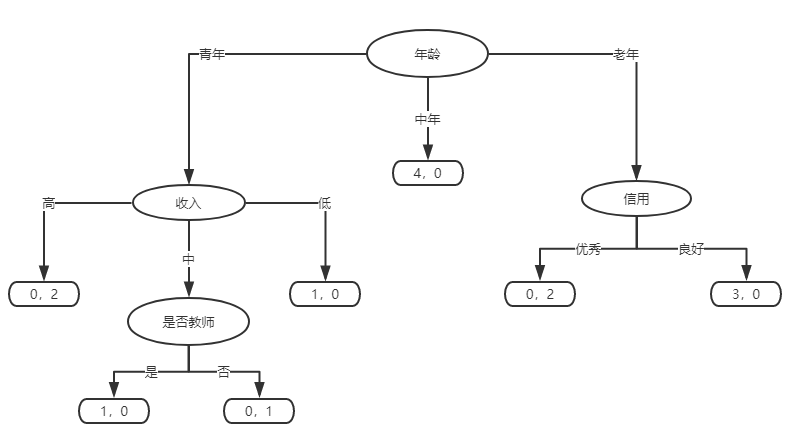


现在就遇到了第一个问题，选择年龄作为根节点、收入作为二级节点有什么依据吗？

肯定是有的。

## （一）节点字段的选择

**如果根节点以及中间节点的选择合理的话，决策树的分类效果会非常好，判断分类效果好坏的依据是叶节点的输出是不是‘纯净’的，即是否都为0:N或者N:0的类型**

在根节点年龄中，有5个购买，9个不购买，为5：9，显然显得不够纯净，所以在年龄基础上让树节点不断生长，最终的叶节点都为纯净类型的，不存在混杂现象。当然，这是非常理想的状况，在实际问题中，我们很难找到这种完全纯净的叶节点，对比回归模型中使得拟合线与原数据间误差最小的原则，决策树的评价目标就是让最后的叶节点纯净度尽可能的高。

那么，叶节点的纯净度如何衡量？

### 信息增益

**熵原本是物理学中的一个定义，后来引申到了信息论领域，用来表示信息量的大小，信息量越大（分类越不‘纯净’），熵值就越大。**

熵值的计算公式：

$H\left(p_{1}, p_{2}, \cdots p_{k}\right)=-\sum_{k=1}^{K} p_{k} \log _{2} p_{k}$

对于某个事件而言，他有k中可能性，$p_{k}$表示第k个可能值发生的概率，在实际中，将概率$p_{k}$的值用经验概率替换，所以经验信息熵表示为

$H(D)=-\sum_{k=1}^{K} \frac{\left|C_{k}\right|}{|D|} \log _{2} \frac{\left|C_{k}\right|}{|D|}$

|D|表示事件中所有的可能性数量，|$C_{k}$|表示事件中k事件出现的次数。

以本例作为案例，总共14个样本，9次购买，5次未购买，表示它的经验信息熵为：

$H(B u y)=-\frac{9}{14} \log _{2} \frac{9}{14}-\frac{5}{14} \log _{2} \frac{5}{14}=0.940$


以上计算的是单个事件情况下的信息熵，如果需要基于其他事件计算某个事件的熵，称之为条件熵，条件熵并不等同于条件概率,它是已知事件各取值条件下条件熵的期望。

在D条件下A的条件熵计算公式为：

$\begin{aligned} H(D | A) &=\sum_{i, k} P\left(A_{i}\right) H\left(D_{k} | A_{i}\right) \\ &=-\sum_{i, k} P\left(A_{i}\right) P\left(D_{k} | A_{i}\right) \log _{2} P\left(D_{k} | A_{i}\right) \\ &=-\sum_{i=1}^{n} \sum_{k=1}^{K} P\left(A_{i}\right) P\left(D_{k} | A_{i}\right) \log _{2} P\left(D_{k} | A_{i}\right) \\ &=-\sum_{i=1}^{n} P\left(A_{i}\right) \sum_{k=1}^{K} P\left(D_{k} | A_{i}\right) \log _{2} P\left(D_{k} | A_{i}\right) \\ &=-\sum_{i=1}^{n} \frac{\left|D_{i}\right|}{|D|} \sum_{k=1}^{k} \frac{\left|D_{i k}\right|}{\left|D_{i}\right|} \log _{2} \frac{\left|D_{i k}\right|}{\left|D_{i}\right|} \end{aligned}$

应用到当前数据集中，

$H(\text {BuylAge})=-\frac{5}{14}\left(\frac{2}{5} \log \left(\frac{2}{5}\right)+\frac{3}{5} \log \left(\frac{3}{5}\right)\right)-\frac{4}{14}\left(\frac{4}{4} \log \left(\frac{4}{4}\right)+\frac{0}{4} \log \left(\frac{0}{4}\right)\right)$
$-\frac{5}{14}\left(\frac{3}{5} \log \left(\frac{3}{5}\right)+\frac{2}{5} \log \left(\frac{2}{5}\right)\right)=0.694$

最终的结果0.694就是在buy条件下选择age字段的条件熵，对于离散型的变量buy而言，决策树在生长的过程中，从根节点到最后的叶节点，信息熵是不断下降的过程，由根节点的0.94减小到各节点的0，每一步下降的量就称之为信息增益，计算公式表示为：

$\operatorname{Gain}_{A}(D)=H(D)-H(D | A)$

所以，计算在根节点为buy的情况下，选择income、tea、credit的信息增益，值最大，就证明信息增益下降就越多，证明就越能达到高纯净度，就是最合适的子节点

Gain_age $(B u y)=H(B u y)-H(B u y | A g e)=0.940-0.694=0.246$

Gain_lncome $(B u y)=H(B u y)-H(\text {Buyllncome})=0.940-0.911=0.029$

Gain_stu $(B u y)=H(B u y)-H(B u y | S t u)=0.940-0.789=0.151$

Gain_credit $(B u y)-H(B u y | \text { Credit })=0.940-0.892=0.048$

所以这就是为什么选择根节点为年龄的原因，在根节点为年龄的情况下，年龄对于是否购买的信息增益最大，即纯净度越高。

所以为什么不单独计算H(A)的信息熵呢？因为H(A)的信息熵没法单独计算，它总是收到上一级节点条件的影响。

针对连续型的自变量该如何计算呢？

1. 将n个连续型数据按照顺序排列，求出n-1个相邻数值间的均值，x均 = (xi+xj)/2，
2. 使用每个分组的 x均 值，将数据划分为两组数据，一组小于x均，一组大于x均，然后计算这两部分的信息增益，
3. 重复第2步即可得到n-1个信息增益，选区最大的作为x对因变量的信息增益

### 信息增益率

以上是对离散型数据决策树的选择字段的方式，为ID3算法，但是该指标存在一个明显的缺点，即信息增益会偏向于取值较多的字段，为了克服这种缺点，决策树中的另一种算法是使用信息增益率作为指标，即C4.5算法，该算法在信息增益的基础上实施惩罚，即

**信息增益率=该节点信息增益/该节点的信息熵**

Gain.Ratio$_{A}(D)=\frac{\operatorname{Gain}_{A}(D)}{H_{A}}$

$H_{A}$计算公式同上文，按照该种方式进行计算结果分别为

Gain_ratio_age = 0.246/1.577=0.516

Gain_ratio_income = 0.029/1.557=0.019

Gain_ratio_stu = 0.151/1=0.151

Gain_ratio_credit = 0.048/0.985=0.049

依然是选择age作为根节点，以上两种方法只是使用的数据集不同，并没有好坏之分。

### 基尼指数

但是ID3与C4.5算法都只能针对离散型**因变量**，对于连续型的因变量就束手无策，所以为了让决策树能够预测连续型的因变量，有一种算法是**CART算法**，该算法也被称为分类回归树，它使用的字段选择指标为基尼指数。计算公式为：

$Gini(D)=1-\sum_{k=1}^{K}\left(\frac{\left|C_{k}\right|}{|D|}\right)^{2}$

$\frac{\left|C_{k}\right|}{|D|}$就代表$P_k$的概率值。

接下来是条件基尼指数值，仍然是某变量各取值条件下基尼指数的期望，采用的是二分法原理。比如对于案例种的age，分为三种类型，计算时可以拆分为青年、非青年，中年、非中年等，单独计算条件基尼指数，计算公式为：

$\begin{aligned} \operatorname{Gin} i_{A}(D) &=\sum_{l, k} P\left(A_{i}\right) \operatorname{Gin} i\left(D_{k} | A_{i}\right) \\ &=\sum_{i=1}^{2} P\left(A_{i}\right)\left(1-\sum_{k=1}^{K}\left(p_{i k}\right)^{2}\right) \\ &=\sum_{i=1}^{2} P\left(\frac{\left|D_{i}\right|}{|D|}\right)\left(1-\sum_{k=1}^{K}\left(\frac{\left|D_{i k}\right|}{\left|D_{i}\right|}\right)^{2}\right) \end{aligned}$

**最后，考虑自变量对因变量的影响程序，基尼指数下降幅度最大，影响就越强，最终计算公式为：**

$\Delta \operatorname{Gini}(D)=\operatorname{Gini}(D)-\operatorname{Gini}_{A}(D)$

即，ΔGini(𝐷)越大，就选择这个节点作为节点。

**对于数值型的自变量，求解基尼指数的方式与求解信息增益的方式一致，只不过将相关公式替换为了基尼指数，**

**对于数值型的预测问题，CART算法时将叶节点中的样本均值作为该节点的预测值**

## （二）决策树的剪枝

以上几种算法在建模中都会存在过拟合或者欠拟合的问题，为了解决过拟合问题，通常会对决策树做剪枝处理。
> **欠拟合：根本原因是特征维度过少，模型过于简单，导致拟合的函数无法满足训练集，误差较大；**

>　　　　　　解决方法：增加特征维度，增加训练数据； 

>**过拟合：根本原因是特征维度过多，模型假设过于复杂，参数过多，训练数据过少，噪声过多，导致拟合的函数完美的预测训练集，但是在拟合过程中会把训练集中一些数据的特点当成所有数据的特点，但这个特点不一定是全部数据的特点，这就使得这个决策树在真实的数据分类中出现错误，也就是模型的“泛化能力”差。即过度的拟合了训练数据，而没有考虑到泛化能力。**
  
>　　　　　　解决方法：（1）减少特征维度；（2）正则化，降低参数值。

有两类剪枝方法：

- 预剪枝：在树的生长过程中进行必要的剪枝，限制树生长的最大深度，限制决策树中间节点及叶节点的最小样本量，限制叶节点的最多数量等。

- 后剪枝：在决策树充分生长的前提下，进行返工修剪，包含误差降低剪枝法、悲观剪枝法、代价复杂度剪枝法。



### 误差降低剪枝法

该方法需要结合测试数据集使用，是一个从下往上的剪枝过程，过程就是不断的将某个非叶节点进行剪枝，使用多数规则，替换当前非叶节点为叶节点，然后使用剪枝后的决策树进行测试，如果新树的误判样本量低于老树的误判样本量，则替换当前非叶节点为叶节点，然后重复，简单粗暴，但是会导致剪枝过度的情况，且需要测试数据集的存在，故不推荐。

### 悲观剪枝法

该方法是从上往下的剪枝过程，相比误差降低剪枝法，加入了剪枝前后叶节点的误判率，如果剪枝后叶节点的误判率期望在剪枝前叶节点误判率期望的一个标准差内，则认为剪枝合理，通过这种方式进行判断是否剪枝，重复以上过程，直到剪枝完成。相关计算公式这里不写了。

### 代价复杂度剪枝法

该方法是一种基于目标函数的剪枝方法，主要思想是：
> 为了平衡上升的误判率与下降的复杂度，引入系数α，通过一系列计算，最终推导出α的计算公式为：

> $\alpha=\frac{C(T)_{a f t e r}-C(T)_{b e f o r e}}{\left|N_{l e a f}\right|-1}$

> 其中$C(T)=\sum_{i=1}^{L} N_{i} \times H(i)$,i表示节点T下第i个叶节点，$N_i$为第i个叶节点的样本量，H(i)为第i个节点的信息熵，$|N_{leaf}$为节点T对应的所有叶节点个数

通过上面的公式计算各非叶节点的α值，选择最小的α值节点进行剪枝，得到一颗新的决策树，然后重新计算α值，再选择最小的α值非叶节点进行剪枝，直至决策树被剪枝为根节点，此时共得到了N棵新树。将测试数据集应用于N棵新树，选取误判率最低的最为最佳决策树。

**注意：python种的sklearn模块并没有提供后剪枝的运算函数，提供的是预剪枝方法。**

## （三）使用sklearn决策树算法对iris进行分类

**python种的sklearn模块采用的是CART算法，既可以处理离散型的分类问题（分类决策树），也可解决连续型的预测问题（回归决策树），对应的类分别为DecisionTreeClassifier类、DecisionTreeRegressor类**

在sklearn中自带了一部分的数据，经典的iris分类问题即是如此，这里我们导入自带数据并使用决策树进行分类

解决iris鸢尾花所属类型的问题，其中这种花的特征有sepal length（萼片长度）、sepal width（萼片宽度）、petal length（花瓣长度）、petal width（花瓣宽度）。


In [90]:
# 导入必要模块
from sklearn.model_selection import train_test_split #切割数据集与测试集
from sklearn.metrics import accuracy_score            # 成绩计算模块
from sklearn.tree import DecisionTreeClassifier     #导入决策树分类器
from sklearn.datasets import load_iris   #导入iris数据集
import pandas as pd

#准备数据集
iris = load_iris() #是一个字典，选取合适键值

#获取相关特征
features = pd.DataFrame(iris.data,columns=['a','b','c','d'])
labels = pd.DataFrame(iris.target,columns=['a'])

#随机划分25%的数据集作为测试集，其余为训练集
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.25,random_state=1234) #random_state为随机种子

#创建CART分类树
clf = DecisionTreeClassifier(criterion='gini') #默认计算方式为gini指数，即CART算法

#拟合构造CART分类树
clf = clf.fit(xtrain,ytrain)

#进行预测
predict = clf.predict(xtest)

#预测结果与测试集结果作对比
score = accuracy_score(ytest,predict)

print('CRAT分类树预测准确率 %.4lf'%score)

CRAT分类树预测准确率 0.9737


## （四）使用sklearn决策树预测波士顿房价

#### CART回归树的工作流程

回归树划分数据集的过程与分类树的过程是一样的，只是得到的结果是连续值，将叶节点中的样本均值作为该节点的预测值。

在分类树中，评价分类结果正确性的是预测正确的比例值，但是在回归树中，是根据样本的混乱程度，也就是样本的离散程度来评价“不纯度”。
评价方法：
1. 最小绝对偏差（LAD），即计算差值的绝对值，为每个样本值减去样本均值的绝对值
2. 最小二乘偏差（LSD），也就是方差

In [112]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# 准备数据集
boston=load_boston()

# 探索数据
#print(boston.feature_names)

# 获取特征集和房价
features = boston.data
prices = boston.target

# 随机抽取 25% 的数据作为测试集，其余为训练集
train_features, test_features, train_price, test_price = train_test_split(features, prices,test_size=0.25,random_state=1234)

# 创建 CART 回归树
dtr = DecisionTreeRegressor()

# 拟合构造 CART 回归树
dtr.fit(train_features, train_price)

# 预测测试集中的房价
predict_price = dtr.predict(test_features)

# 测试集的结果评价
print('回归树二乘偏差均值:', mean_squared_error(test_price, predict_price))
print('回归树绝对值偏差均值:', mean_absolute_error(test_price, predict_price))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
回归树二乘偏差均值: 14.07244094488189
回归树绝对值偏差均值: 2.763779527559055


# 三、随机森林

随机森林属于集成算法，该算法综合了多棵决策树，可以很好的避免单棵决策树的过拟合问题。

> 简单算法一般复杂度低，速度快，易展示结果，但预测效果往往不是特别好。每种算法好像一种专家，集成就是把简单的算法（后文称基算法/基模型）组织起来，即多个专家共同决定结果。

该算法的核心步骤：

1. 利用Bootstrap抽样法，从原始数据集中生成k个数据集，每个数据集都含有N个观测值和P个自变量，
2. 针对每个数据集，使用CART算法生成决策树，注意：在生成决策树的过程中，并没有使用所有的自变量，而是再次随机选取p个自变量
3. 让每一个决策树尽可能生长，使得每个节点尽可能的‘纯净’，即不需要进行剪枝
4. 针对生成的k个决策树，对分类问题利用多数原则进行投票，将最高的票的类别用于最终的判断结果；对回归问题利用均值法，将其用作预测样本的最终结果

> Bootstrap抽样法:Bootstrap抽样的基本思想是在全部样本未知的情况下，借助部分样本的有放回多次抽样，构建某个估计的置信区间。
举例说明：如果想要统计全校学生的平均年龄，但是学校总体的数据比较难拿到，而且数据量很大，但是现在你已经有了一部分学生的年龄信息，比如200个学生的信息。 
现在你从这200个学生信息中有放回的抽取200次，计算对应的平均年龄θ，重复i次（根据自己的需要选择确定重采样的次数i），这i个θ的分布大概就能代表全校学生的平均年龄。 

随机森林的随机性体现在两个方面，一是每棵树的样本数据集是随机的，二是树中每个节点的分裂字段也是随机的，两个随机性的引入，使得随机森林不容易陷入过拟合的状况。

**sklearn的子模块ensemble提供了产生随机森林的类，RandomForstClassifier,**
```
from sklearn import ensemble
help(ensemble.RandomForestClassifier) #查看这个类
```
其中关于决策树的参数：
criterion: ”gini” or “entropy”(default=”gini”)是计算属性的gini(基尼不纯度)还是entropy(信息增益)，来选择最合适的节点。

splitter: ”best” or “random”(default=”best”)随机选择属性还是选择不纯度最大的属性，建议用默认。

max_features: 选择最适属性时划分的特征不能超过此值。

当为整数时，即最大特征数；当为小数时，训练集特征数*小数；

if “auto”, then max_features=sqrt(n_features).

If “sqrt”, thenmax_features=sqrt(n_features).

If “log2”, thenmax_features=log2(n_features).

If None, then max_features=n_features.

max_depth: (default=None)设置树的最大深度，默认为None，这样建树时，会使每一个叶节点只有一个类别，或是达到min_samples_split。

min_samples_split:根据属性划分节点时，每个划分最少的样本数。
min_samples_leaf:叶子节点最少的样本数。

max_leaf_nodes: (default=None)叶子树的最大样本数。

min_weight_fraction_leaf: (default=0) 叶子节点所需要的最小权值

verbose:(default=0) 是否显示任务进程
关于随机森林特有的参数：

n_estimators=10：决策树的个数，越多越好，但是性能就会越差，可以达到可接受的性能和误差率。 

bootstrap=True：是否有放回的采样。  
oob_score=False：oob（out of band，带外）数据，即：在某次决策树训练中没有被bootstrap选中的数据。多单个模型的参数训练，我们知道可以用cross validation（cv）来进行，但是特别消耗时间，而且对于随机森林这种情况也没有大的必要，所以就用这个数据对决策树模型进行验证，算是一个简单的交叉验证。性能消耗小，但是效果不错。  

n_jobs=1：并行job个数。这个在ensemble算法中非常重要，尤其是bagging（而非boosting，因为boosting的每次迭代之间有影响，所以很难进行并行化），因为可以并行从而提高性能。1=不并行；n：n个并行；-1：CPU有多少core，就启动多少job

warm_start=False：热启动，决定是否使用上次调用该类的结果然后增加新的。  

class_weight=None：各个label的权重。  

# 四、随机森林使用案例--泰坦尼克号乘客生存概率

In [1]:
# 导入所有使用到的模块，并设定matplotlib的绘图基础格式
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

large = 22; med = 16; small = 12 #其余字体大小统一设置为14
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (15, 8),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid') #更改模块风格

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签 plt.rcParam
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['savefig.dpi'] = 300 #保存图片像素
#plt.rcParams['figure.dpi'] = 300 #显示分辨率


#百度 Echarts 里面的一组颜色，
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

**选择Kaggle竞赛平台上的入门案例，泰坦尼克号乘客生存预测，该案例是一个典型的分类问题，存在多种方法求解，比如线性回归、逻辑回归、随机森林，本章使用随机森林模型进行求解。**

在泰坦尼克号事件中，一些人群在事故中被救的几率高于其他人，比如妇女、儿童和上层阶级。 这个案例中，我们需要分析和判断出什么样的人更容易获救。利用随机森林来预测出在这场灾难中哪些人会最终获救。

数据集中包含两个重要的数据，一个是训练数据集，一个是测试数据集。

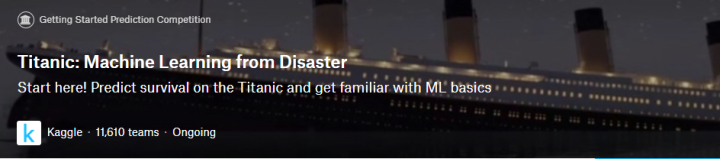

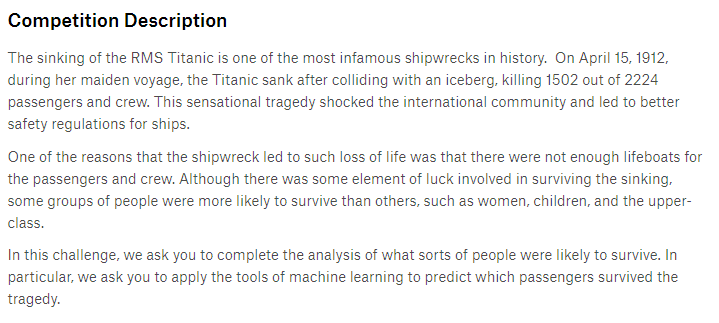

## （一）导入数据集

In [94]:
import os
pa = "E:/data/Titanic/"
df = pd.read_csv(os.path.join(pa,'train.csv')) #训练数据集
test = pd.read_csv(os.path.join(pa,'test.csv')) #测试数据集
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head() # 测试数据集

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## （二）数据字段含义

| 字段 | 字段说明 | 
|:------: |:------:|
| PassengerId|乘客编号 
| Survived | 存活情况（存活：1 ; 死亡：0）
| Pclass	| 客舱等级
| Name	| 乘客姓名
| Sex	| 性别
| Age	| 年龄
| SibSp	| 同乘的兄弟姐妹/配偶数
| Parch	| 同乘的父母/小孩数
| Ticket	| 船票编号
| Fare	| 船票价格
| Cabin	| 客舱号
| Embarked	| 登船港口

## （三）数据特征分析

要进行一次查看，看是否需要进行清洗

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
# 由于Pclass代表着客舱等级，且后续需要进行哑变量处理，所以要更改存储类型
df.Pclass = df.Pclass.astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


In [4]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## （四）数据处理

### 剔除无关变量

通过数据探索我们发现，PassengerId 为乘客编号，对分类没有作用，可以放弃；Name
为乘客姓名，对分类没有作用，可以放弃；Cabin 字段缺失值太多，可以放弃；Ticket 字
段为船票号码，杂乱无章且无规律，可以放弃。其余的字段包括：Pclass、Sex、Age、
SibSp、Parch 和 Fare，这些属性分别表示了乘客的船票等级、性别、年龄、亲戚数量以
及船票价格，可能会和乘客的生存预测分类有关系。具体是什么关系，我们可以交给分类
器来处理

In [5]:
#对于表中的字段，有些字段在建模过程中并没有实际意义，所以这里进行剔除，剔除PassengerId、Name、Ticket、Cabin四个字段
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

### 缺失值处理

In [6]:
# 查看缺失值
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Age缺失177个，Embarked缺失2个，需要进行处理。

处理缺失值的方法可分为三类，删除记录、数据插补和不处理，常用的数据插补方法有以下几种：

- 均值/中位数/众数插补
- 使用固定值
- 最近邻插补
- 回归方法
- 插值法：拉格朗日插值法、牛顿插值法

针对Embarked字段，使用众数插补，针对Age字段，由于数量巨大，为了更加精确，这里按照性别进行分组，再使用分组均值进行插补。


In [7]:
# Age缺失值处理,分组填充平均值
female = dict(df.groupby(df.Sex).Age.mean())['female']
male = dict(df.groupby(df.Sex).Age.mean())['male']
df1 = df[df.Sex=='female']
df1.Age.fillna(female,inplace=True)
df2 = df[df.Sex=='male']
df2.Age.fillna(male,inplace=True)
df = pd.concat([df1,df2])
# Embarked缺失值处理,众数填充
df.Embarked.fillna(value=df.Embarked.mode()[0],inplace=True)

E:\software\ANACONDA\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
df.isnull().sum() #再无缺失值

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 数据变量矩阵图

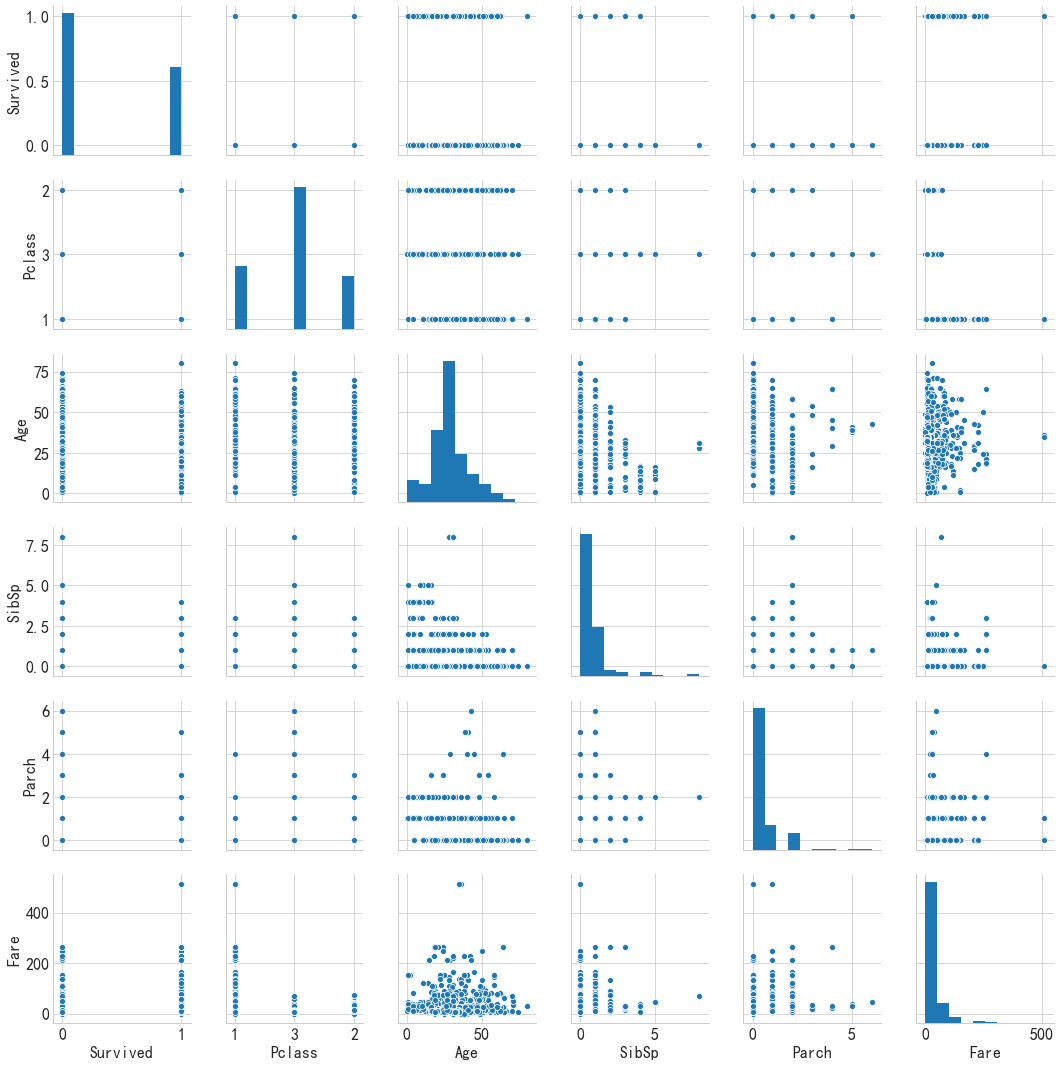

In [9]:
import seaborn as sns 
#散点图矩阵
sns.pairplot(df)

并没有特别明显的关系

### 哑变量处理

虚拟变量 ( Dummy Variables) 又称虚设变量、名义变量或哑变量，用以反映质的属性的一个人工变量，是量化了的质变量，通常取值为0或1。引入哑变量可使线形回归模型变得更复杂，但对问题描述更简明，一个方程能达到两个方程的作用，而且接近现实。

哑变量（Dummy Variable），也叫虚拟变量，引入哑变量的目的是，将不能够定量处理的变量量化，如职业、性别对收入的影响，战争、自然灾害对GDP的影响，季节对某些产品（如冷饮）销售的影响等等。 这种“量化”通常是通过引入“哑变量”来完成的。根据这些因素的属性类型，构造只取“0”或“1”的人工变量，通常称为哑变量（dummy variables），记为D。

举一个例子，假设变量“职业”的取值分别为：工人、农民、学生、企业职员、其他，5种选项，我们可以增加4个哑变量来代替“职业”这个变量，分别为D1（1=工人/0=非工人）、D2(1=农民/0=非农民)、D3（1=学生/0=非学生）、D4(1=企业职员/0=非企业职员)，最后一个选项“其他”的信息已经包含在这4个变量中了，所以不需要再增加一个D5（1=其他/0=非其他）了。这个过程就是引入哑变量的过程，其实在结合分析（conjoint analysis）中，就是利用哑变量来分析各个属性的效用值的。

**重点：引入哑变量的目的是为了将不能够定量处理的定量量化，比如，本案例中的出发港口有C、S、Q三个港口，如果在Embarked列中使用CSQ，则计算机无法识别，所以，我们需要将该列拆分为三列，然后以0或1的方式代表该列是否是存在，这种处理方式就是哑变量处理，对质的属性进行量化。**


python的pandas模块种有专门的函数进行哑变量处理，pandas.get_dummies,接下来我们进行处理。

In [10]:
# 哑变量处理
dumm = pd.get_dummies(df[['Sex','Pclass','Embarked']])
dumm.head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,1,0,0,0,0,1
8,1,0,0,0,1,0,0,1
9,1,0,0,1,0,1,0,0


In [11]:
#哑变量处理之后的文档合并到原来的数据中，
df = pd.concat([df,dumm],axis=1)
#去除原表中的'Sex','Pclass','Embarked'字段
df.drop(['Sex','Pclass','Embarked'],axis=1,inplace=True)
#最终处理的结果如下
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
8,1,27.0,0,2,11.1333,1,0,0,0,1,0,0,1
9,1,14.0,1,0,30.0708,1,0,0,1,0,1,0,0


## （五）数学建模

### 构建决策树模型

首先，需要将已有数据进行拆分，拆分为训练集和测试集，当然，如果有测试集的话可以不必拆分，这里使用的是sklearn中的model_selection.train_test_split()方法进行拆分，该方法参数如下：

- train_data：所要划分的样本特征集
- train_target：所要划分的样本结果
- test_size：如果为小数则代表样本占比（0到1），如果是整数则代表样本的数量，默认为0.25
- random_state：是随机数的种子，默认为None。如果种子相同，则随机数相同，如果种子不同，则随机数不同。在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，则代表随机数的种子是一个随机值，每次结果都不同。
- shuffle：划分前是否对数组或矩阵进行洗牌，默认为True。



放了防止构建的决策树产生过拟合，需要对决策树进行预剪枝，sklearn中的预剪枝方法通过三种方式：
1. 限制树生长的最大深度
2. 设置树的中间节点能够继续分支的最小样本量
3. 叶节点的最小样本量

在机器学习模型中，需要人工选择的参数称为超参数。比如随机森林中决策树的个数，人工神经网络模型中隐藏层层数和每层的节点个数，正则项中常数大小等等，他们都需要事先指定。超参数选择不恰当，就会出现欠拟合或者过拟合的问题。而在选择超参数的时候，有两个途径，一个是凭经验微调，另一个就是选择不同大小的参数，带入模型中，挑选表现最好的参数。


GridSearchCV的名字其实可以拆分为两部分，GridSearch和CV，即网格搜索和交叉验证。这两个名字都非常好理解。网格搜索，搜索的是参数，即在指定的参数范围内，按步长依次调整参数，利用调整的参数训练学习器，从所有的参数中找到在验证集上精度最高的参数，这其实是一个训练和比较的过程。

GridSearchCV可以保证在指定的参数范围内找到精度最高的参数，但是这也是网格搜索的缺陷所在，他要求遍历所有可能参数的组合，在面对大数据集和多参数的情况下，非常耗时。





In [12]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
8,1,27.0,0,2,11.1333,1,0,0,0,1,0,0,1
9,1,14.0,1,0,30.0708,1,0,0,1,0,1,0,0


In [13]:
#导入模块
from sklearn import metrics #评估模型的指标库
from sklearn import model_selection
#from sklearn.model_selection import GridSearchCV 
from sklearn import tree

#构建测试数据集
x_train,x_test,y_train,y_test = model_selection.train_test_split(df[df.columns[1:]],df.Survived,test_size=0.25,random_state=1234)
#由于原数据集已经给出了测试数据集，so，这里去除构建测试数据集，将所有数据用作训练数据集
#更正：源数据集不是测试数据集，是提交结果数据集，so，还是需要划分测试数据集
#x_train = df[df.columns[1:]]  #将之前构造的特征用作训练集
#y_train = df.Survived  #最终的目标就是预测是否存活

#预设各参数的不同选项值
max_depth = [2,3,4,5,6]
min_samples_split = [2,4,6,8]
min_samples_leaf = [2,4,8,10,12]
param = {'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

#网格搜索法，测试不同的参数值
grid_dtcateg = model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(),param_grid=param,cv=10)

#模型拟合
grid_dtcateg.fit(x_train,y_train)

#返回最佳组合的参数值
grid_dtcateg.best_params_


{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

最终获取的参数为{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4}，接下来使用这些参数值构建决策树。

In [14]:
# 构建决策树
cart_class = tree.DecisionTreeClassifier(max_depth=6,min_samples_leaf=2,min_samples_split=4)
#cart_class = tree.DecisionTreeClassifier()

#模型拟合
decision_tree = cart_class.fit(x_train,y_train)

#模型在测试集上的预测
pred = cart_class.predict(x_test)

#模型的准确率
print("测试集准确度",metrics.accuracy_score(y_test,pred))

print("训练集准确度",metrics.accuracy_score(y_train,cart_class.predict(x_train)))

测试集准确度 0.7892376681614349
训练集准确度 0.8832335329341318


*测试集的准确度78.9%，并不是很高，so，什么原因？为什么和书本中的不一致？*

#### 绘制ROC曲线

以上的准确度指标无法体现正例和负例子的覆盖率，为了进一步验证模型在测试集上的预测效果，需要绘制ROC曲线

> ROC曲线：
最早的ROC曲线分析方法诞生于雷达图识别，用来作为评估雷达可靠性的指标,能反映模型在选取不同阈值的时候其敏感性（sensitivity, FPR）和其精确性（specificity, TPR）的趋势走向。不过，相比于其他的P-R曲线（精确度和召回率），ROC曲线有一个巨大的优势就是，当正负样本的分布发生变化时，其形状能够基本保持不变，

[机器学习基础 - ROC曲线理解](https://www.jianshu.com/p/2ca96fce7e81)

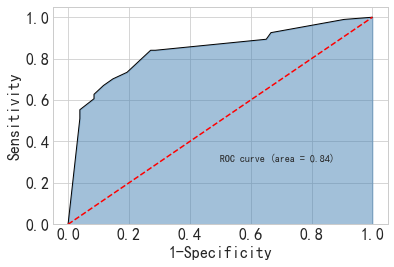

In [15]:
# 导入第三方包
import matplotlib.pyplot as plt
y_score = cart_class.predict_proba(x_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

AUC即为阴影部分的面积，值为0.84，超过0.8，拟合效果还行。

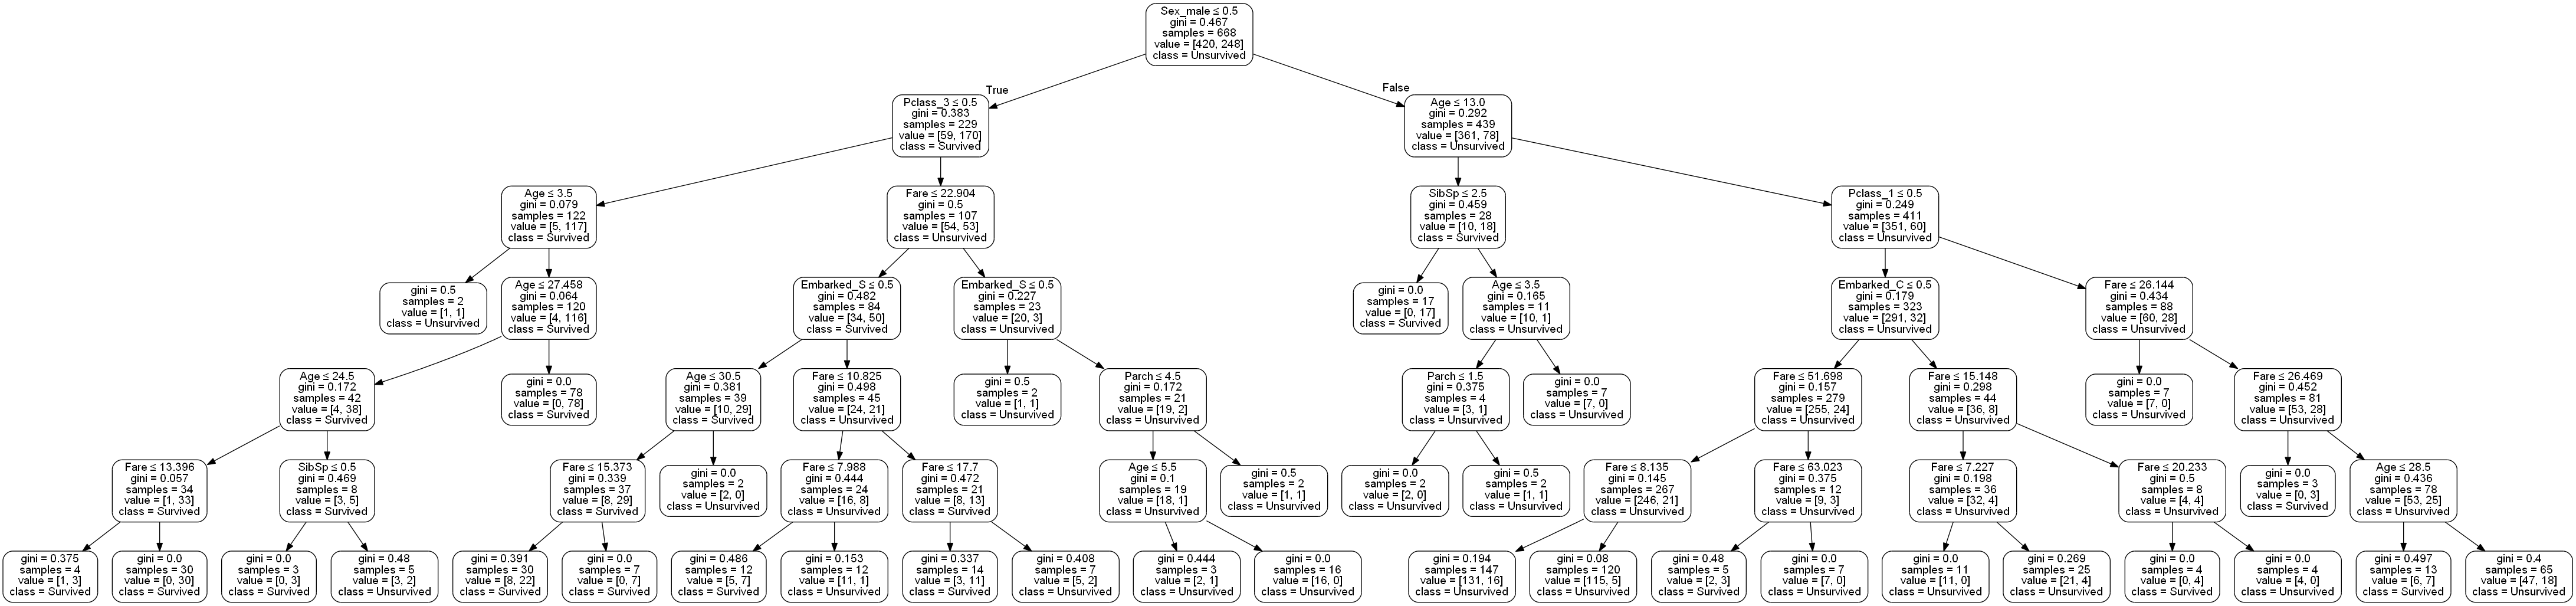

In [113]:
# 绘制决策树图
# 导入第三方模块
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
# 绘制决策树
dot_data = StringIO()
export_graphviz(
    decision_tree,
    out_file=dot_data,  
    feature_names=df.columns[1:],
    class_names=['Unsurvived','Survived'],  
    # filled=True,
    rounded=True,  
    special_characters=True
)
# 决策树展现
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz 2.28/bin/'
Image(graph.create_png()) 

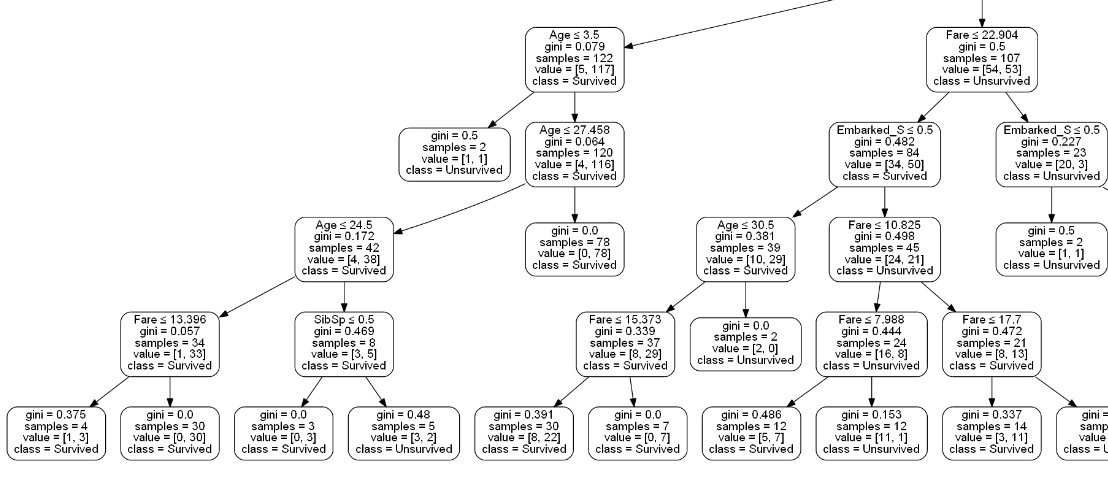

这是绘制出来的决策树图

### 构建随机森林模型

In [19]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier


#200棵决策树，不设置后面的停止条件，完全拟合，不进行预剪枝
RF = RandomForestClassifier(random_state=1234,n_estimators=200,min_samples_split=2,min_samples_leaf=1) 

#随机森林进行拟合
RF.fit(x_train,y_train)

#模型在测试集上的预测
pred = RF.predict(x_test)

scores = metrics.accuracy_score(y_test,pred)
print(scores)

0.7713004484304933


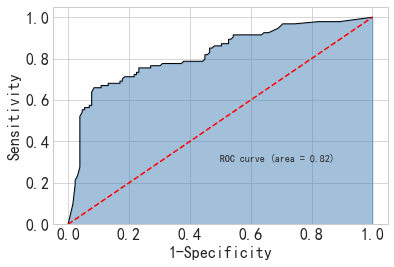

In [17]:
# 导入第三方包
import matplotlib.pyplot as plt
y_score = RF.predict_proba(x_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

用了随机森林，结果准确性还降低了？留待后续解决。

### 成绩提交

In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [81]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [100]:
#对预测数据进行处理，和拟合过程中的步骤一致

# Age缺失值处理,分组填充平均值,注意，在填充时务必确保不改变test数据集顺序，

#求出男女性不同的年龄均值
female = dict(test.groupby(test.Sex).Age.mean())['female']
male = dict(test.groupby(test.Sex).Age.mean())['male']

#分男女组分别填充空值
test['maleAge'] = test[test.Sex=='male'].Age.fillna(male)
test['femaleAge'] = test[test.Sex=='female'].Age.fillna(female)
test['maleAge'].fillna(0,inplace=True)
test['femaleAge'].fillna(0,inplace=True)
test['Age'] = test['maleAge'] + test['femaleAge']
test.drop(labels=['maleAge','femaleAge'],axis=1,inplace=True)

# Embarked缺失值处理,众数填充
test.Fare.fillna(value=test.Fare.mode()[0],inplace=True)

#哑变量处理及删除不必要特征
test.Pclass = test.Pclass.astype('str')
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
du = pd.get_dummies(test[['Sex','Pclass','Embarked']])

#哑变量处理之后的文档合并到原来的数据中，
test = pd.concat([test,du],axis=1)

#去除原表中的'Sex','Pclass','Embarked'字段
test.drop(['Sex','Pclass','Embarked'],axis=1,inplace=True)

#最终处理的结果如下
test.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,0,0,1,0,1,0
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


In [101]:
# 使用随机森林进行预测
m = RF.predict(test)
m

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [113]:
# 写入答案中
res = pd.read_csv(os.path.join(pa,'gender_submission.csv'))
res.drop(['Survived'],axis=1,inplace=True)
res['Survived'] = pd.Series(m)
ms = res.set_index('PassengerId',drop=True)
ms.to_csv('gender_submission.csv') #保存文件，并上传成绩
ms.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0


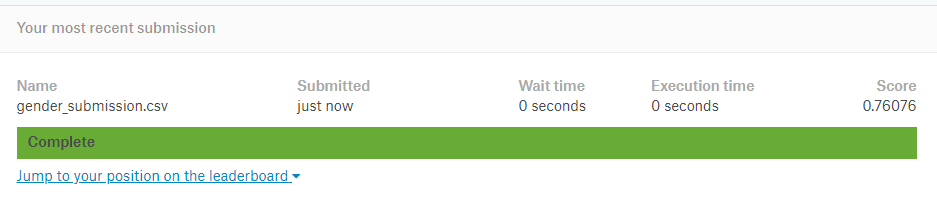

最终结果76分，说明还有很大的优化空间，待后续换逻辑回归试下。